#Diamonds project

In [ ]:
import numpy as np
import pandas as pd
import os

###Display all columns in PD

In [ ]:
desired_width = 420
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 20)

###Read diamonds.csv as a dataframe .

In [ ]:
def load_data(diamonds_path, datafile):
    csv_path = os.path.join(diamonds_path, datafile )
    return pd.read_csv(csv_path)

In [ ]:
diamond = load_data('',  "diamonds.csv")

###Check the head of diamond, and check out its info() and describe() methods.

In [ ]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


###Drop Colums 0. we dont need it

In [ ]:
diamond.drop(diamond.columns[0], axis=1, inplace=True)

In [ ]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


###find Duplicated Data and Remove it.

In [ ]:
diamond.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [ ]:
diamond.drop_duplicates(inplace=True)

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


###search if we have 0 Value in X Y Z

In [ ]:
(diamond.x == 0).sum()

7

In [ ]:
(diamond.y == 0).sum()

6

In [ ]:
(diamond.z == 0).sum()

19

###Dropping 0 Row from x , y , z colum 

In [ ]:
diamond = diamond.drop(diamond[diamond["x"]==0].index)
diamond = diamond.drop(diamond[diamond["y"]==0].index)
diamond = diamond.drop(diamond[diamond["z"]==0].index)

###Display Plot Graphic to find outlier Value

In [ ]:
import matplotlib.pyplot as plt

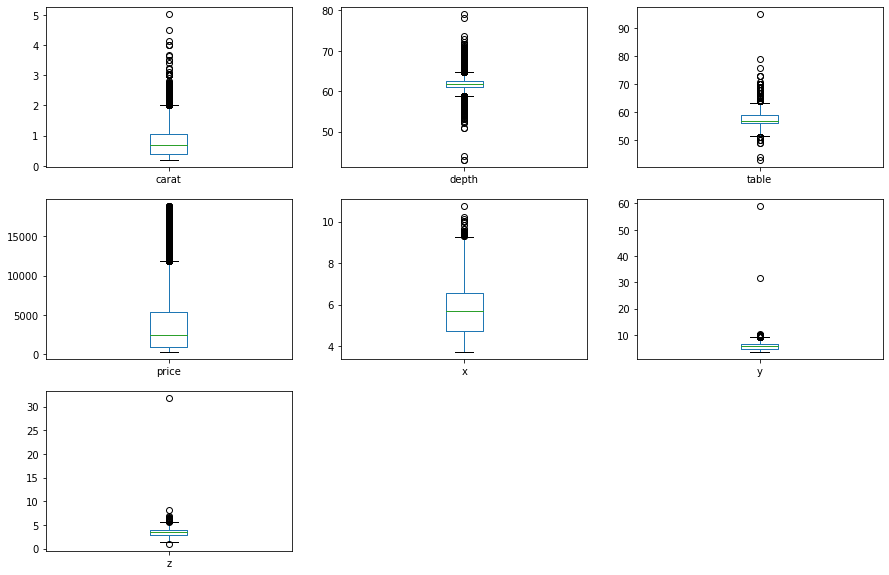

In [ ]:
diamond.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

###search Outliers and replace with NAN

In [ ]:
def outliers(datafram, col):
    a = []
    q1 = datafram[col].quantile(.25)
    q2 = datafram[col].quantile(.5)
    q3 = datafram[col].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))
    for i in datafram[col]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in diamond.select_dtypes(exclude='object').columns:
    diamond[col] = outliers(diamond , col)

###Drop NAN Value

In [ ]:
 diamond.dropna(inplace=True)

###displays the total count of missing values per column.

In [ ]:
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

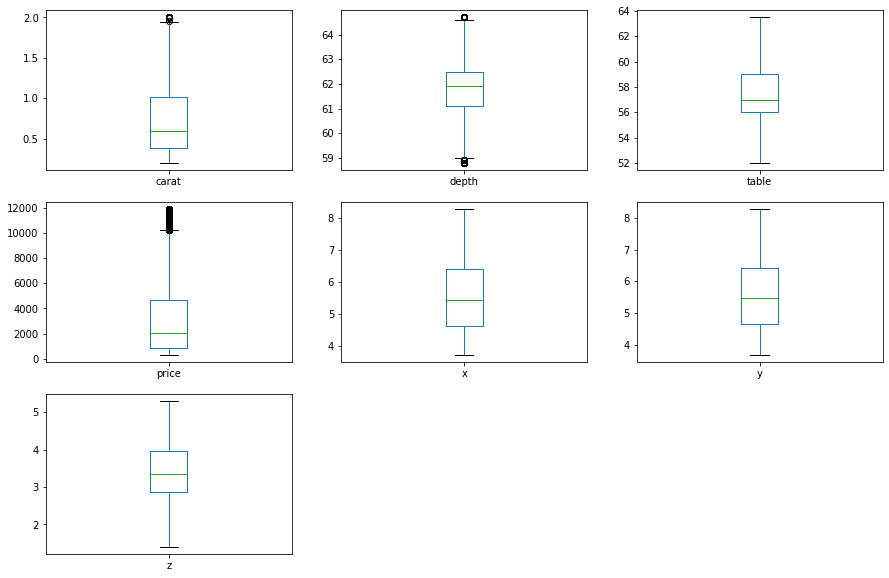

In [ ]:
diamond.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [ ]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000
mean,0.708891,61.785926,57.261603,3111.518645,5.547276,5.552146,3.428745
std,0.370974,1.106231,2.021752,2750.147119,0.979628,0.973734,0.606007
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,61.100000,56.000000,891.000000,4.640000,4.650000,2.860000
50%,0.600000,61.900000,57.000000,2064.000000,5.440000,5.460000,3.360000
75%,1.010000,62.500000,59.000000,4637.000000,6.410000,6.410000,3.980000
max,2.000000,64.700000,63.500000,11883.000000,8.280000,8.270000,5.300000


###choose Features from dataset

In [ ]:
diamond_features = diamond.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']]

In [ ]:
target = diamond.loc[:, 'price']

###create PLT list.

In [ ]:
plt_list = []
for i in diamond_features:
    plt_list.append(i)

###create Correlation Graph.

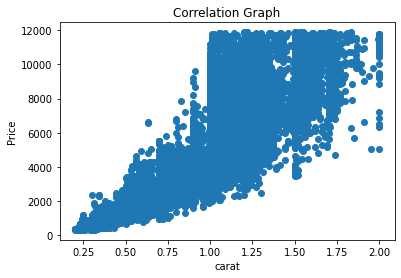

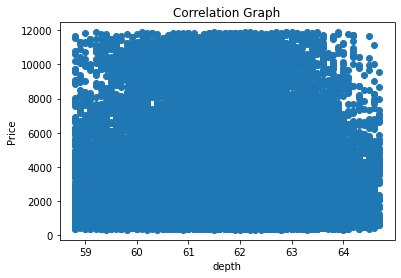

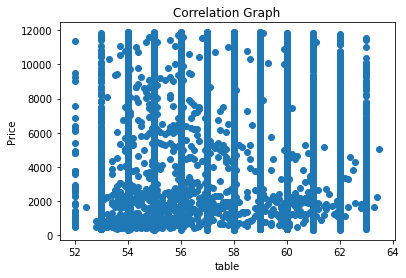

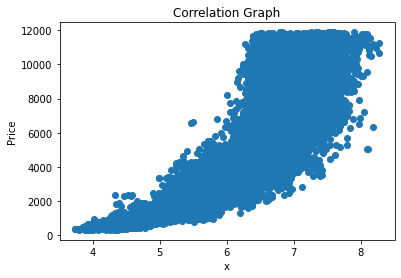

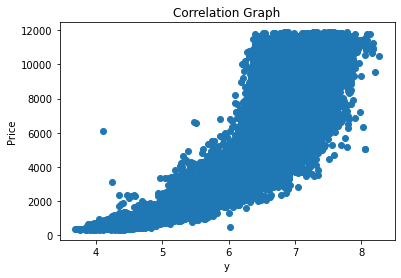

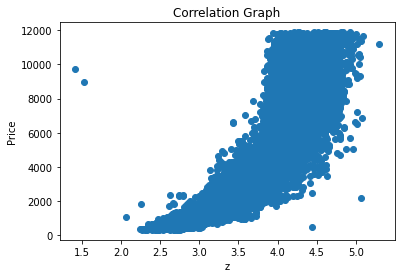

In [ ]:
for i in plt_list:
    plt.scatter(diamond_features[i], target)
    plt.title('Correlation Graph')
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

###convert the correlation matrix to a heatmap plot

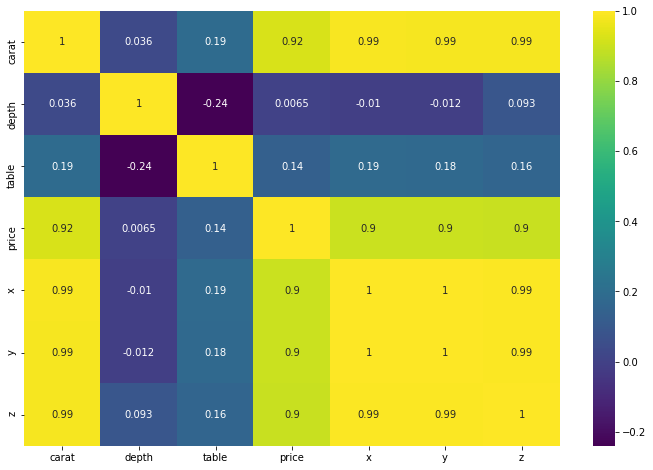

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(diamond.corr(), annot=True, cmap='viridis')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d95a8dfd0>,
      dtype=object)

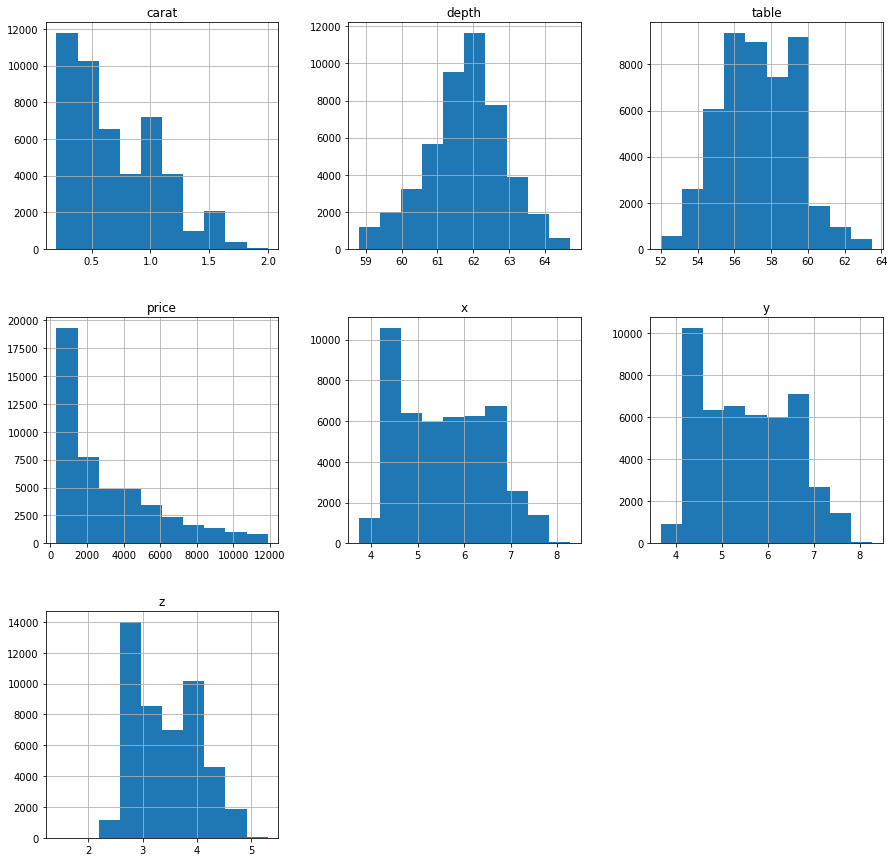

In [ ]:
diamond.hist(figsize=(15,15))

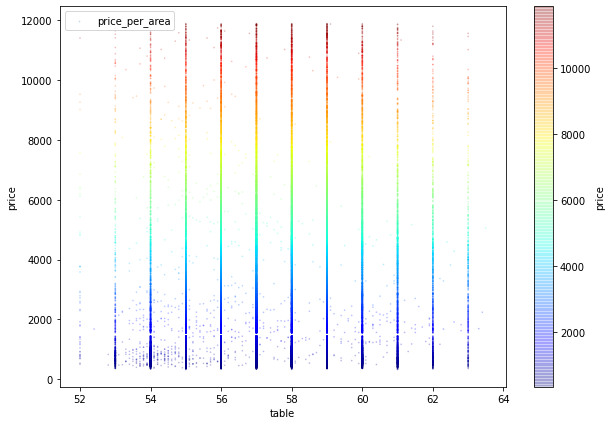

In [ ]:
diamond.plot(kind="scatter", x="table", y="price", alpha=0.2, s=diamond["table"]/100, label="price_per_area", figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar= True, sharex=False)
plt.show()

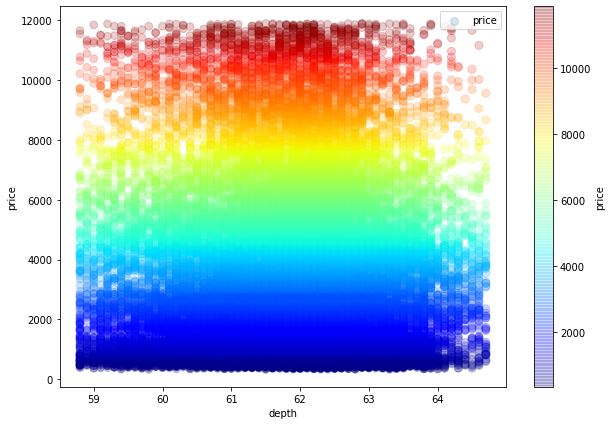

In [ ]:
diamond.plot(kind="scatter", x="depth", y="price", alpha=0.2, s=diamond["depth"], label="price", figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar= True, sharex=False)
plt.show()

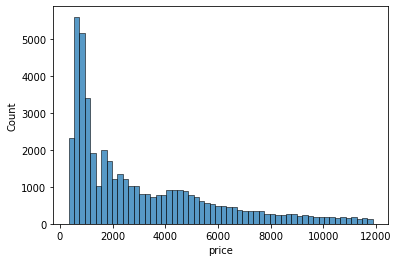

In [ ]:
sns.histplot(diamond.price)

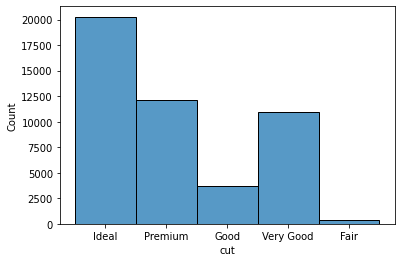

In [ ]:
sns.histplot(diamond.cut)

In [ ]:
from pandas.plotting import scatter_matrix

###check for correlation between attributes is to use the pandas scatter_matrix()

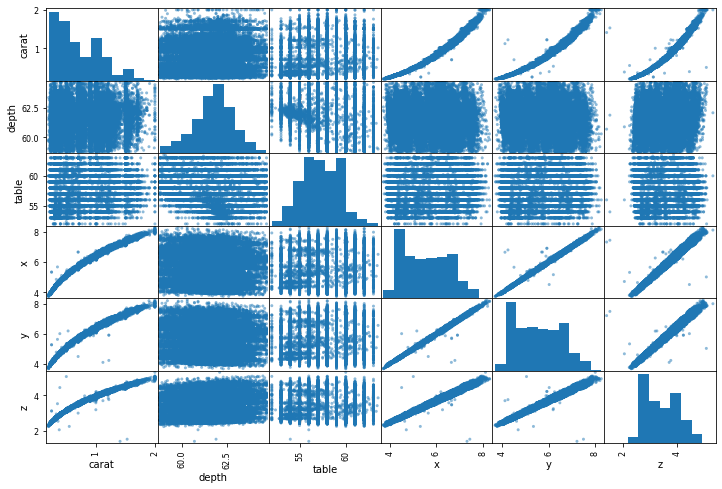

In [ ]:
scatter_matrix(diamond[plt_list], figsize=(12, 8))
plt.show()

###search if we have group in columns

In [ ]:
X = diamond.loc[:, ['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
X_array = np.array(X)

###Extract Unique Value

In [ ]:
np.unique(X_array[:, 1])

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [ ]:
np.unique(X_array[:, 2])

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [ ]:
np.unique(X_array[:, 3])

array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)

###encode Group Columns using OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(
        categories=[['Fair', 'Good', 'Very Good', 'Ideal', 'Premium'], ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
X_array[:, 1:4] = encoder.fit_transform(X_array[:, 1:4])

In [ ]:
 X = pd.DataFrame(X_array)

In [ ]:
X_array = np.array(X)
Y_array = np.array(target)

###splitting the data into test and train sets 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, test_size=0.2)

###Building pipelins of standard scaler and model for varios regressors.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -819.479659 
DecisionTree: -495.912755 
RandomForest: -376.271542 


In [ ]:
from sklearn import metrics

In [ ]:
pred = pipeline_rf.predict(X_test)

In [ ]:
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 217.84951106322174
MSE: 137912.95530089823
RMSE: 371.3663357129968


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,pred)*100

98.23476630335807

##Fine Your Model

Import GridSearchCv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
              {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
] 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 10, scoring='neg_mean_squared_error', return_train_score = True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j